# Timeseries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 6
pd.options.display.max_columns = 6

/Users/jreback/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Frequency

# Resampling

In [1]:
df = pd.read_hdf('data/beer.hdf')

In [4]:
review_times = df.time.value_counts().sort_index()
review_times

2009-10-05 21:31:48    1
2009-10-05 21:32:09    1
2009-10-05 21:32:13    1
                      ..
2009-12-25 17:23:52    1
2009-12-25 17:25:06    1
2009-12-25 17:26:06    1
Name: time, dtype: int64

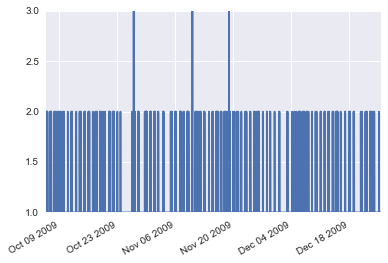

In [5]:
review_times.plot()

Right now the frequency is way to high to be meaningful. `resample` lets you adjust the frequency.

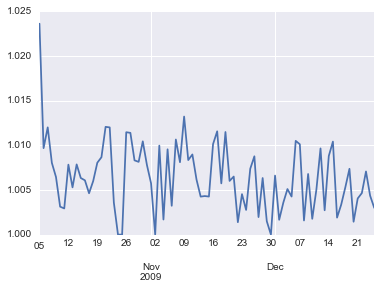

In [6]:
review_times.resample("D").plot()

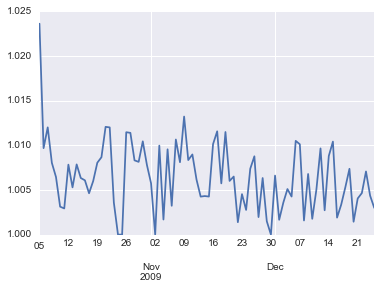

In [18]:
# resampling by grouping
(df
  .time
  .value_counts()
  .groupby(pd.Grouper(level=0,freq='D'))
  .mean()
  .plot
  .line()
)


# Timedeltas